<a href="https://colab.research.google.com/github/rvprieto/Data-Expert-Assignment-19/blob/main/Data_Expert_Assignment_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ---- Bibliotecas gerais
import pandas as pd #dataframes
import numpy as np #arrays
import matplotlib.pyplot as plt #graficos
import seaborn as sns #graficos 2
import datetime as dt
from google.colab import files 
from google.colab import drive


# ---- Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# ---- Possíveis Modelos utilizados
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression

# ---- Cálculo das Métricas
from sklearn import metrics

# ***Tirar Warning***
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: CC GENERAL.csv          


In [ ]:
df= pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe(percentiles=[0.001,.01,.1,.25,.5,.75,.9,.95,.99,],include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C15873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
0.1%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,294.800000,0.000000,1.253614,0.000000,6.000000
1%,NaN,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,19.524478,0.000000,6.000000
10%,NaN,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,179.617069,106.034864,0.000000,10.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.drop(columns='CUST_ID', inplace=True)

In [ ]:
for a in df.columns:
  df[a].fillna(df[a].min(),inplace=True)

In [ ]:
col_outlines=['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']

df[col_outlines]=df[col_outlines][df[col_outlines]<df[col_outlines].quantile(.95)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8502 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8502 non-null   float64
 3   ONEOFF_PURCHASES                  8502 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8502 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8480 non-null   float64
 11  PURCHASES_TRX                     8498 non-null   float64
 12  CREDIT

In [ ]:
df['TENURE']= df['TENURE'].astype('float64')

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
df.describe(percentiles=[0.001,.01,.1,.25,.5,.75,.9,.95,.99,])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
0.1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,0.000000,0.019163,0.000000,6.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.019163,0.000000,6.000000
10%,16.840323,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,155.821669,72.640922,0.000000,10.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000


In [ ]:
df['CREDIT_LIMIT'].std()

2465.720074866465

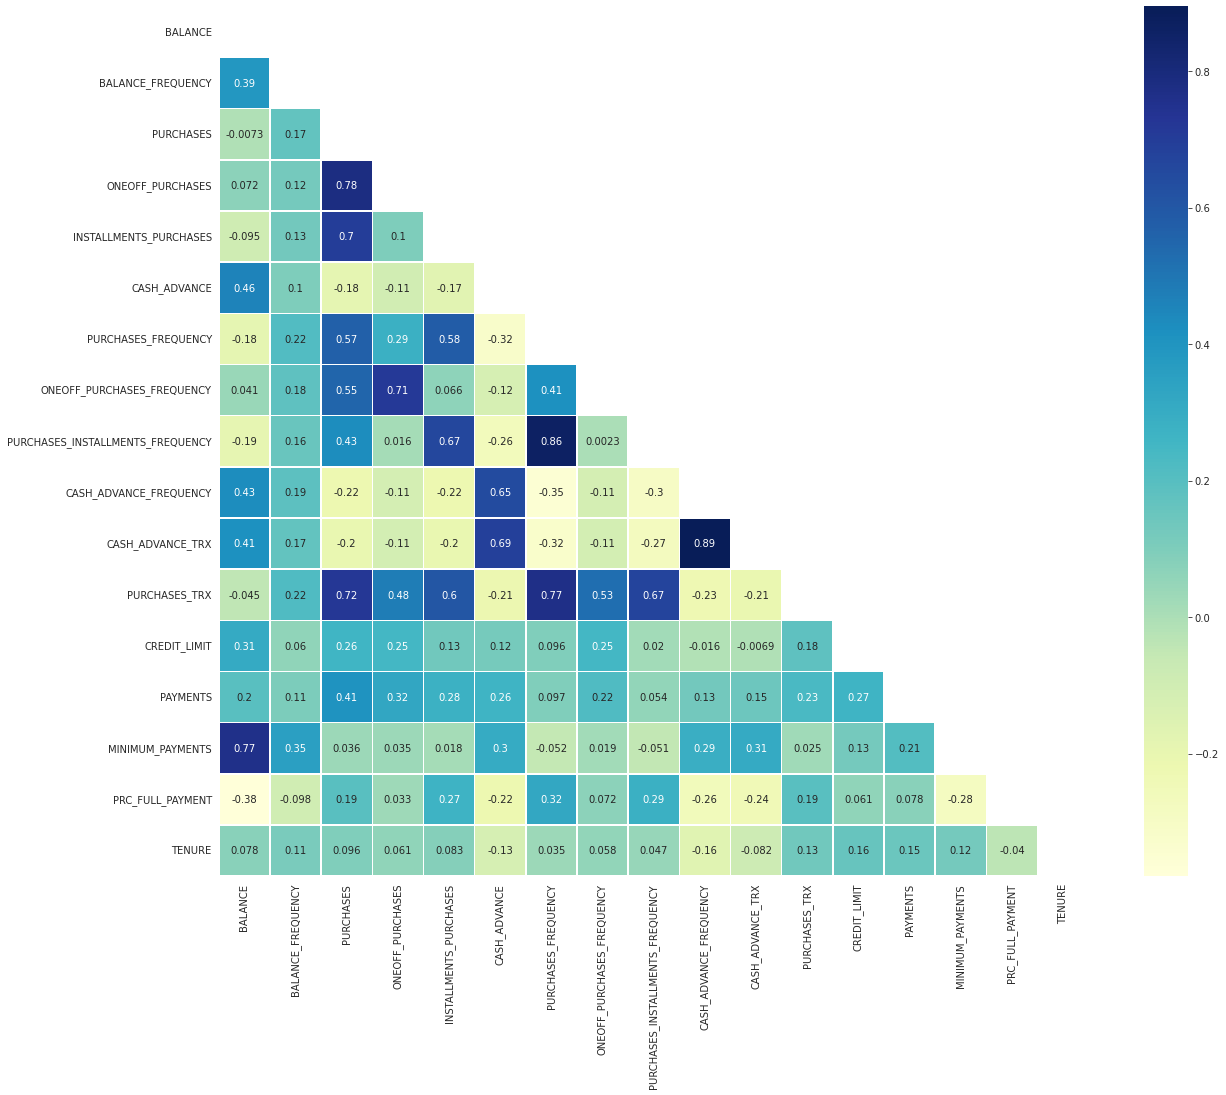

In [ ]:


mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 16))
    ax = sns.heatmap(df.corr(),annot=True, cmap="YlGnBu", mask=mask, square=True, linewidths=.5)

#Clusterização

In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing
from sklearn.preprocessing import normalize
normalized_df = normalize(scaled_df,axis=1)

normalized_df = pd.DataFrame(normalized_df,columns=df.columns)


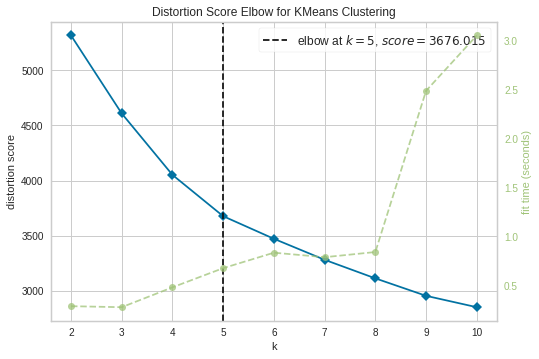

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=13)
visualizer = KElbowVisualizer(model)

visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

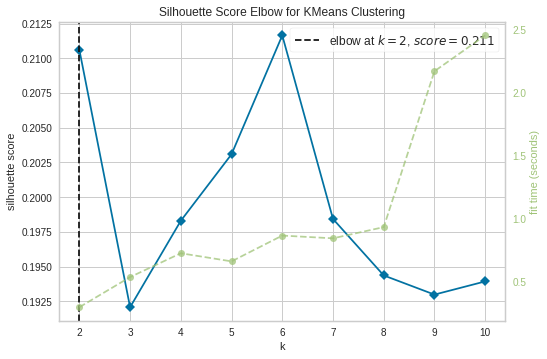

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=13)
visualizer = KElbowVisualizer(model,metric='silhouette')

visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

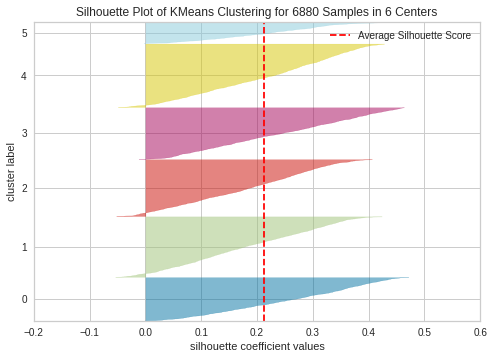

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Specify the features to use for clustering


# Instantiate the clustering model and visualizer
model = KMeans(6, random_state=13)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(normalized_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(6, random_state=3)
normalized_df['cluster'] = gm.fit_predict(normalized_df).astype('str')

In [ ]:
normalized_df.cluster.value_counts()

2    1833
0    1318
3    1294
5     970
1     755
4     710
Name: cluster, dtype: int64

In [ ]:
normalized_df['cluster'] = gm.fit_predict(normalized_df).astype('str')

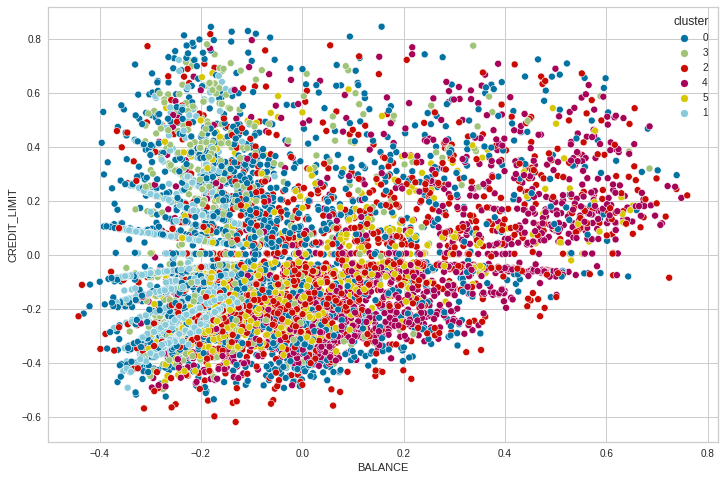

In [ ]:
#Plotando o cluster por duas dimensões do nosso banco de dados
plt.figure(figsize= (12,8))
sns.scatterplot('BALANCE', 'CREDIT_LIMIT', data = normalized_df, hue = 'cluster')

In [ ]:
#visualizando os cluster em 3d
import plotly.express as px
fig = px.scatter_3d(normalized_df, x='BALANCE', y='PURCHASES', z='CREDIT_LIMIT',
              color='cluster')
fig.show()

#Regressão

In [ ]:
X= normalized_df.drop(columns=['CREDIT_LIMIT','cluster'])

y= normalized_df[['CREDIT_LIMIT','cluster']]

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=13)

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500,solver='adam').fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
regr.score(X_test, y_test)

0.662791711853479

In [ ]:
#Erro medio ao quadrado e absoluto
from sklearn.metrics import mean_squared_error , mean_absolute_error
#Erro medio ao quadrado

print("RMSE = {}".format(mean_squared_error(y_test,y_pred, squared=False)))
print("MAE = {}".format(mean_absolute_error(y_test, y_pred)))

RMSE = 0.36990075602099914
MAE = 0.2537853109411647


#Outras Análises

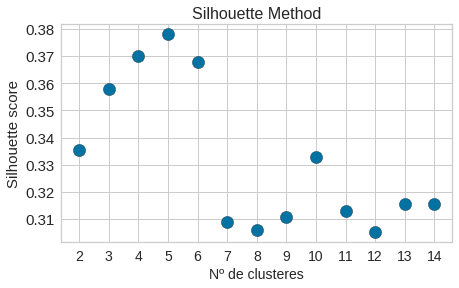

In [ ]:
#Library Import
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.cluster import KMeans


# Normalize
df_nme  = normalize(df)


alvo = df_nme
max = 15
km_silhouette = []
km_score=[]

for i in range(2,max):
  km = KMeans(n_clusters=i, random_state=0).fit(alvo)
  preds = km.predict(alvo)
  km_score.append(-km.score(alvo))
  silhouette = metrics.silhouette_score(alvo,preds)
  km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Nº de clusteres",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

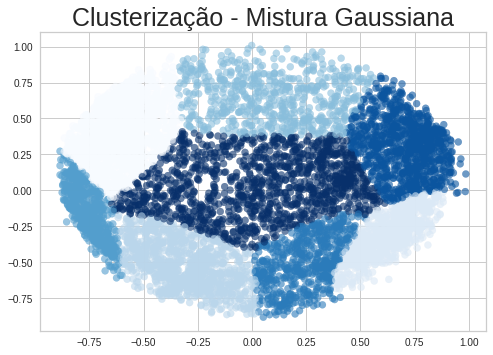

In [ ]:
#Library Import
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Normalizing
normalized_df = normalize(scaled_df,axis=1)

# PCA
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Plotagem da clusterização (em 2D)
plt.title('Clusterização - Mistura Gaussiana',fontsize=25)
plt.scatter(X_principal['P1'],X_principal['P2'],
c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues')
plt.show()
